In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification

from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lenovo\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
#XOR Dataset....Perfect non linear dataset
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])

Y = np.array([0,1,1,0])

In [3]:
X.shape

(4, 2)

In [4]:
Y.shape

(4,)

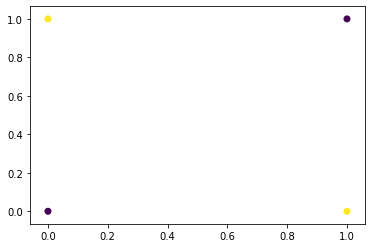

In [5]:
plt.scatter(X[:, 0], X[:, 1], c= Y)
plt.show()

In [6]:
input_shape = 2
layers = [4, 3]
output_size = 2 
EPOCHS = 50

In [8]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea, axis = 1).reshape(-1, 1)
#instead of reshape we may also use keepdims=true. Keep dimention true

In [9]:
#Trying our softmax function
a = np.array([[5,10], 
             [20, 20]])
softmax(a)

array([[0.00669285, 0.99330715],
       [0.5       , 0.5       ]])

In [10]:
class NeuralNetwork:
    def __init__(self, input_size, layers, output_size):
#         np.random.seed(0)
        model = {}
    
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0] ))
        
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1] ))
        
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size ))
        
        self.model = model
        
        
    def forward(self, X):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        
        Z1 = np.dot(X, W1) + b1
        A1 = np.tanh(Z1)
        #We can use any non linear activation funtion
        
        Z2 = np.dot(A1, W2) + b2
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2, W3) + b3
        A3 = softmax(Z3)
        
        # storing my activation units of each layer
        self.activation_units = (A1, A2, A3)
        
        return A3
        
        
    
    def backward(self, X, Y, learning_rate = 0.001):
        
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        A1, A2, A3 = self.activation_units
        
        
        
        dZ3 = (A3 - Y)
        
        dW3 = np.dot(A2.T, dZ3)
        db3 = np.sum(dZ3, axis = 0)
        
        
        dZ2 =  (1 - np.square(A2)) * np.dot(dZ3, W3.T)
        
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis =0)
        
        
        dZ1 =  (1 - np.square(A1)) * np.dot(dZ2, W2.T)
        
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis =0)
        
        
        
        self.model['W1'] -= learning_rate*dW1
        self.model['W2'] -= learning_rate*dW2
        self.model['W3'] -= learning_rate*dW3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    
    def predict(self, X):
        y_out = self.forward(X)
        return np.argmax(y_out, axis = 1)
    
    
    def summary(self):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        A1, A2, A3 = self.activation_units
        
        
        print("W1 ", W1.shape)
        print("W2 ", W2.shape)
        print("W3 ", W3.shape)
        
        print("b1 ", b1.shape)
        print("b2 ", b2.shape)
        print("b3 ", b3.shape)  
        
        print("A1 ", A1.shape)
        print("A2 ", A2.shape)
        print("A3 ", A3.shape) 
        
        
    def loss(self, y_oht, p):
        l = -np.mean(y_oht*np.log(p))
        return l
        
    def train(self, X, Y, epochs):
        
        training_loss = []
        
        Y_OHT = to_categorical(Y)
        
        
        for i in range(epochs):
            Y_ = self.forward(X)
            l = self.loss(Y_OHT, Y_ )
            
            self.backward(X, Y_OHT)
            
            training_loss.append(l)
            
            print("Loss value : ", l)

In [11]:
model = NeuralNetwork(input_size=2, layers=[4,3], output_size = 2)

In [12]:
model.train(X, Y, 1000)

Loss value :  0.49691304426033167
Loss value :  0.49433316594560794
Loss value :  0.491769673919943
Loss value :  0.48922403298803113
Loss value :  0.4866976906245792
Loss value :  0.48419206782144364
Loss value :  0.48170855005209423
Loss value :  0.47924847848607893
Loss value :  0.4768131415833725
Loss value :  0.47440376719222255
Loss value :  0.4720215152645488
Loss value :  0.46966747129038067
Loss value :  0.46734264053767705
Loss value :  0.465047943166667
Loss value :  0.4627842102692055
Loss value :  0.46055218086419525
Loss value :  0.45835249986053617
Loss value :  0.4561857169799881
Loss value :  0.4540522866143459
Loss value :  0.4519525685749409
Loss value :  0.4498868296781309
Loss value :  0.4478552460984028
Loss value :  0.44585790641122147
Loss value :  0.4438948152408464
Loss value :  0.44196589742403586
Loss value :  0.4400710025986914
Loss value :  0.4382099101269241
Loss value :  0.4363823342644436
Loss value :  0.43458792949232766
Loss value :  0.432826295932772

Loss value :  0.29066123806084454
Loss value :  0.2904477343574759
Loss value :  0.29023511054072826
Loss value :  0.2900233564325393
Loss value :  0.2898124619528063
Loss value :  0.28960241711860646
Loss value :  0.2893932120434198
Loss value :  0.2891848369363539
Loss value :  0.2889772821013711
Loss value :  0.28877053793651936
Loss value :  0.2885645949331652
Loss value :  0.28835944367522903
Loss value :  0.28815507483842406
Loss value :  0.2879514791894986
Loss value :  0.28774864758547947
Loss value :  0.28754657097292063
Loss value :  0.287345240387154
Loss value :  0.28714464695154285
Loss value :  0.28694478187673994
Loss value :  0.28674563645994794
Loss value :  0.2865472020841832
Loss value :  0.28634947021754353
Loss value :  0.2861524324124792
Loss value :  0.2859560803050674
Loss value :  0.2857604056142902
Loss value :  0.2855654001413168
Loss value :  0.2853710557687884
Loss value :  0.28517736446010783
Loss value :  0.2849843182587323
Loss value :  0.284791909287470

Loss value :  0.24988880793558893
Loss value :  0.24973572287582596
Loss value :  0.2495826070457021
Loss value :  0.2494294597957914
Loss value :  0.24927628048657563
Loss value :  0.24912306848836327
Loss value :  0.24896982318120944
Loss value :  0.2488165439548375
Loss value :  0.2486632302085594
Loss value :  0.2485098813511994
Loss value :  0.24835649680101696
Loss value :  0.24820307598563085
Loss value :  0.24804961834194397
Loss value :  0.24789612331606914
Loss value :  0.24774259036325547
Loss value :  0.2475890189478157
Loss value :  0.24743540854305357
Loss value :  0.24728175863119356
Loss value :  0.24712806870330917
Loss value :  0.24697433825925363
Loss value :  0.24682056680759065
Loss value :  0.24666675386552578
Loss value :  0.24651289895883888
Loss value :  0.24635900162181668
Loss value :  0.2462050613971864
Loss value :  0.24605107783605046
Loss value :  0.2458970504978204
Loss value :  0.24574297895015335
Loss value :  0.2455888627688877
Loss value :  0.2454347

Loss value :  0.1982873507466902
Loss value :  0.19812337660860552
Loss value :  0.19795942169326444
Loss value :  0.19779548646850476
Loss value :  0.19763157140196977
Loss value :  0.19746767696109466
Loss value :  0.19730380361309402
Loss value :  0.19713995182494756
Loss value :  0.19697612206338772
Loss value :  0.1968123147948862
Loss value :  0.1966485304856414
Loss value :  0.19648476960156452
Loss value :  0.1963210326082684
Loss value :  0.19615731997105296
Loss value :  0.1959936321548935
Loss value :  0.19582996962442828
Loss value :  0.1956663328439452
Loss value :  0.1955027222773702
Loss value :  0.19533913838825412
Loss value :  0.19517558163976118
Loss value :  0.19501205249465614
Loss value :  0.19484855141529248
Loss value :  0.19468507886360037
Loss value :  0.19452163530107486
Loss value :  0.19435822118876322
Loss value :  0.19419483698725443
Loss value :  0.19403148315666624
Loss value :  0.1938681601566341
Loss value :  0.1937048684462997
Loss value :  0.1935416

In [14]:
model.model

{'W1': array([[ 0.69336701, -0.61283201,  1.16625392,  0.33653975],
        [ 1.56962024, -0.2920482 ,  0.69327453, -2.15380476]]),
 'b1': array([[-0.1737358 ,  0.1430739 , -0.02739801, -0.2632817 ]]),
 'W2': array([[ 0.40526425,  1.77839053,  0.16991929],
        [-0.07725148,  1.74926143,  1.25334287],
        [-1.14589507,  0.5668325 , -1.70242363],
        [-0.1617069 ,  1.413094  ,  0.12997841]]),
 'b2': array([[-0.00688852, -0.09774222,  0.0457695 ]]),
 'W3': array([[-1.05470655, -0.87970913],
        [-0.67563891,  1.66017931],
        [-0.66815192, -1.11480238]]),
 'b3': array([[-0.00631688,  0.00631688]])}

In [15]:
model.summary()

W1  (2, 4)
W2  (4, 3)
W3  (3, 2)
b1  (1, 4)
b2  (1, 3)
b3  (1, 2)
A1  (4, 4)
A2  (4, 3)
A3  (4, 2)


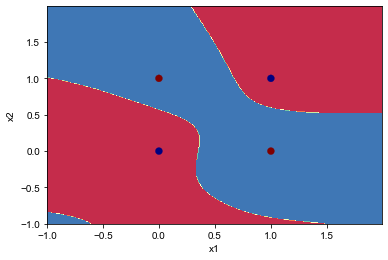

In [18]:
from visualize import plot_decision_boundary
plot_decision_boundary(lambda x: model.predict(x), X, Y)

In [19]:
outputs = model.predict(X)
outputs

array([0, 1, 1, 0], dtype=int64)

In [20]:
np.sum(Y== outputs)/outputs.shape

array([1.])

# Trying on other dataset

In [21]:
X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)

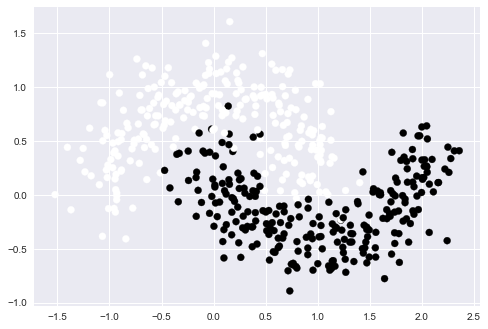

In [22]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [23]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

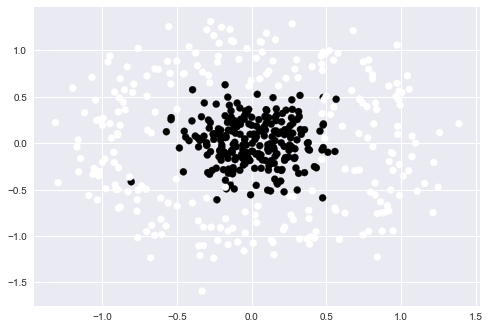

In [24]:
plt.scatter(X[:, 0], X[:, 1], c = Y)